# Slip1 

In [1]:
#q.1 Data Collection from Online, Local Drive, and .csv File:import pandas as pd
# From CSV file
df_csv = pd.read_csv('Employee.csv')
df_csv
# From local drive
with open('your_local_file.txt', 'r') as file:
    data = file.read()
# From online (requires URL)
df_online = pd.read_csv('https://example.com/data.csv')




,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [2]:
#Q.2) Write a python code for North-West corner method.13 15 16 17

import numpy as np
import pandas as pd

# Define the supply, demand, and cost matrix
supply = [17, 12, 16]
demand = [14, 8, 23]
costs = np.array([[13, 15, 16],
                  [7, 11, 2],
                  [19, 20, 9]])

# Initialize allocation matrix with zeros
allocation = np.zeros((len(supply), len(demand)), dtype=int)

# North-West Corner Method
i, j = 0, 0
while i < len(supply) and j < len(demand):
    if supply[i] < demand[j]:
        allocation[i, j] = supply[i]
        demand[j] -= supply[i]
        i += 1
    else:
        allocation[i, j] = demand[j]
        supply[i] -= demand[j]
        j += 1

# Convert allocation and costs to a DataFrame for better readability
allocation_df = pd.DataFrame(allocation, columns=["D1", "D2", "D3"], index=["O1", "O2", "O3"])
cost_df = pd.DataFrame(costs, columns=["D1", "D2", "D3"], index=["O1", "O2", "O3"])

# Display the allocation and cost matrix
print("Cost Matrix:")
print(cost_df)
print("\nAllocation Matrix (Initial Basic Feasible Solution):")
print(allocation_df)

# Calculate total cost
total_cost = (allocation * costs).sum()
print("\nTotal Transportation Cost:", total_cost)


Cost Matrix:
    D1  D2  D3
O1  13  15  16
O2   7  11   2
O3  19  20   9

Allocation Matrix (Initial Basic Feasible Solution):
    D1  D2  D3
O1  14   3   0
O2   0   5   7
O3   0   0  16

Total Transportation Cost: 440


# Slip2 

In [ ]:
#Q.1) To Perform Data collection from online, local drive and .csv file.
import pandas as pd

# From CSV file
df_csv = pd.read_csv('your_file.csv')

# From local drive
with open('your_local_file.txt', 'r') as file:
    data = file.read()

# From online (requires URL)
df_online = pd.read_csv('https://example.com/data.csv')



In [3]:
#Q.2) Write a python code for Least Cost Method. Ex. Obtain the IBFS of the following T.P. by Least Cost Method [8,6,10]
import numpy as np

def least_cost_method(costs, supply, demand):
    costs = np.array(costs)  # Ensure costs is an array
    allocation = np.zeros_like(costs, dtype=int)  # Initialize allocation array as integers
    
    while np.any(supply) and np.any(demand):
        # Find minimum cost cell
        i, j = np.unravel_index(np.argmin(costs), costs.shape)
        
        # Allocate as much as possible to the cell with the minimum cost
        allocation[i][j] = min(supply[i], demand[j])
        
        # Update supply and demand
        supply[i] -= allocation[i][j]
        demand[j] -= allocation[i][j]
        
        # Mark the used cell with a large number
        costs[i, j] = 999999  # Large number to represent 'used'

    return allocation

# Example usage
costs = [[8, 6, 10], [9, 12, 13], [14, 9, 16]]
supply = [20, 30, 25]
demand = [30, 25, 20]

print(least_cost_method(costs, supply, demand))


[[ 0 20  0]
 [30  0  0]
 [ 0  5 20]]


# Slip 3 

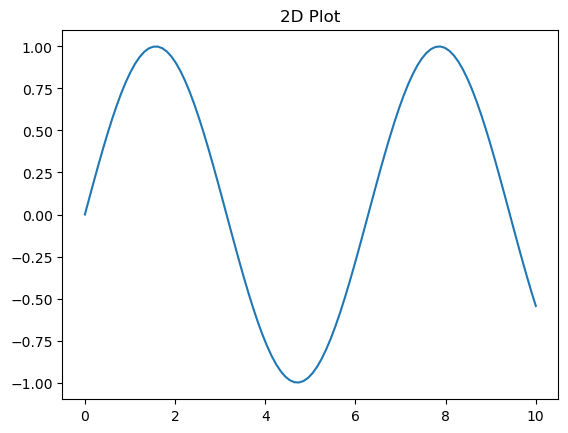

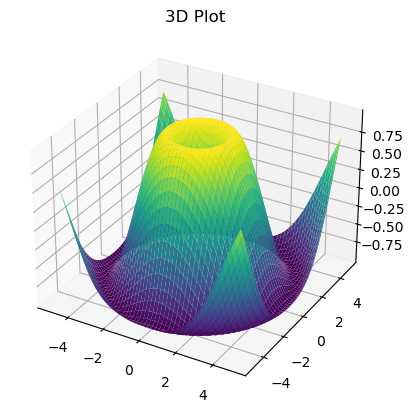

In [9]:
#Q.1] Perform different data visualization for 2d and 3d visualization.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 2D Visualization
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title("2D Plot")
plt.show()

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.title("3D Plot")
plt.show()


In [8]:
#Q.2) Write a python code for Vogel’s Approximation method. Ex. Obtain the IBFS by VAM 21,16,15,13
import numpy as np

def vogel_approximation_method(supply, demand, costs):
    supply = supply[:]
    demand = demand[:]
    costs = np.array(costs)
    allocation = np.zeros_like(costs, dtype=int)
    large_number = 999999  # Large number to represent 'infinity'

    while sum(supply) > 0 and sum(demand) > 0:
        # Calculate row and column penalties
        row_penalties = [(sorted(row[row > 0])[:2] if len(row[row > 0]) >= 2 else [0, 0]) for row in costs]
        row_penalties = [abs(r[1] - r[0]) if r[1] else 0 for r in row_penalties]

        col_penalties = [(sorted(col[col > 0])[:2] if len(col[col > 0]) >= 2 else [0, 0]) for col in costs.T]
        col_penalties = [abs(c[1] - c[0]) if c[1] else 0 for c in col_penalties]

        # Find the maximum penalty
        if max(row_penalties) >= max(col_penalties):
            row = row_penalties.index(max(row_penalties))
            col = np.argmin([cost if demand[c] > 0 else large_number for c, cost in enumerate(costs[row])])
        else:
            col = col_penalties.index(max(col_penalties))
            row = np.argmin([costs[r][col] if supply[r] > 0 else large_number for r in range(len(supply))])

        # Allocate as much as possible to the chosen cell
        allocation[row][col] = min(supply[row], demand[col])
        supply[row] -= allocation[row][col]
        demand[col] -= allocation[row][col]

        # Set completed rows or columns to a large number
        if supply[row] == 0:
            costs[row, :] = large_number
        if demand[col] == 0:
            costs[:, col] = large_number

    return allocation

# Example usage
supply = [11, 13, 19]
demand = [6, 10, 12, 15]
costs = [[21, 16, 15, 13], [17, 18, 14, 23], [32, 27, 18, 41]]

print(vogel_approximation_method(supply, demand, costs))


[[ 0  0  0 11]
 [ 6  3  0  4]
 [ 0  7 12  0]]


# Slip 4

In [45]:
#Q.1) Perform Regression over the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Employee1.csv")

# Data Preprocessing
data.dropna(inplace=True)
X = data[["Gender", "Bonus %", "Senior Management", "Team"]]  # Example feature columns
y = data["Salary"]  # Target variable

# Convert categorical data to numerical (assuming 'Gender', 'Senior Management', and 'Team' need encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output Results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Absolute Error (MAE): 28920.648583359773
Mean Squared Error (MSE): 1148887287.4437635
R^2 Score: -0.021830276544109406
Coefficients: [ -258.52948175  2315.1569587   -448.7226293   -278.40601778
   -79.3980857   3241.67091864  7919.60257658  1520.29145579
  1902.420497   -1189.02208142 -2246.37829395  3494.26932492]
Intercept: 90240.34836898927


In [17]:
#Q.2Write a python code for VAM. Ex. Obtain the IBFS by Vogel’s Approximation Method.D1 D2 D3 Capacity #8 6 10 20
def vogels_approximation_method(supply, demand, cost):
    rows = len(supply)
    cols = len(demand)
    allocation = [[0] * cols for _ in range(rows)]

    while sum(supply) > 0 and sum(demand) > 0:
        row_penalty = [
            max(cost[i]) - sorted(cost[i])[0] if supply[i] > 0 else float('inf')
            for i in range(rows)]
        
        col_penalty = [
            max([cost[i][j] for i in range(rows)]) - min([cost[i][j] for i in range(rows)])
            if demand[j] > 0 else float('inf')
            for j in range(cols)]

        # Find the row/column with the highest penalty
        if min(row_penalty) <= min(col_penalty):
            i = row_penalty.index(min(row_penalty))
            j = cost[i].index(min(cost[i]))
        else:
            j = col_penalty.index(min(col_penalty))
            i = min(range(rows), key=lambda x: cost[x][j] if supply[x] > 0 else float('inf'))

        # Allocate as much as possible
        allocation_amount = min(supply[i], demand[j])
        allocation[i][j] = allocation_amount
        supply[i] -= allocation_amount
        demand[j] -= allocation_amount

    return allocation

def calculate_total_cost(allocation, cost):
    total_cost = 0
    for i in range(len(allocation)):
        for j in range(len(allocation[0])):
            total_cost += allocation[i][j] * cost[i][j]
    return total_cost

# Example usage
supply = [20, 30, 25]  # Supply for each source
demand = [30, 25, 20]  # Demand for each destination
cost = [[8, 6, 10],[9, 12, 13],[14, 9, 16]]

allocation = vogels_approximation_method(supply, demand, cost)
print("Allocation Matrix:")
for row in allocation:
    print(row)

total_cost = calculate_total_cost(allocation, cost)
print(f"\nTotal Transportation Cost: {total_cost}")


Allocation Matrix:
[0, 20, 0]
[30, 0, 0]
[0, 5, 20]

Total Transportation Cost: 755


# Slip 5

In [18]:
#Q.1Classification of dataset.
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:
#Q.2Write a python code for Algebraic Method for solving 2*2 game.
import numpy as np

# Define the payoff matrix for Player A
payoff_matrix = np.array([[3, 2],
                          [1, 4]])

# Extract the elements of the matrix
a = payoff_matrix[0, 0]  # Player A: I vs Player B: I
b = payoff_matrix[0, 1]  # Player A: I vs Player B: II
c = payoff_matrix[1, 0]  # Player A: II vs Player B: I
d = payoff_matrix[1, 1]  # Player A: II vs Player B: II

# Calculate the value of the game for Player A
game_value = (a * d - b * c) / (a + d - b - c)

# Calculate the strategies for Player A
p1 = (d - b) / (a + d - b - c)  # Probability of choosing strategy I for Player A
p2 = 1 - p1  # Probability of choosing strategy II for Player A

# Calculate the strategies for Player B
q1 = (d - c) / (a + d - b - c)  # Probability of choosing strategy I for Player B
q2 = 1 - q1  # Probability of choosing strategy II for Player B

# Display the results
print("Game Value:", game_value)
print("Optimal Strategy for Player A: I =", p1, ", II =", p2)
print("Optimal Strategy for Player B: I =", q1, ", II =", q2)

Game Value: 2.5
Optimal Strategy for Player A: I = 0.5 , II = 0.5
Optimal Strategy for Player B: I = 0.75 , II = 0.25


# Slip 6 

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


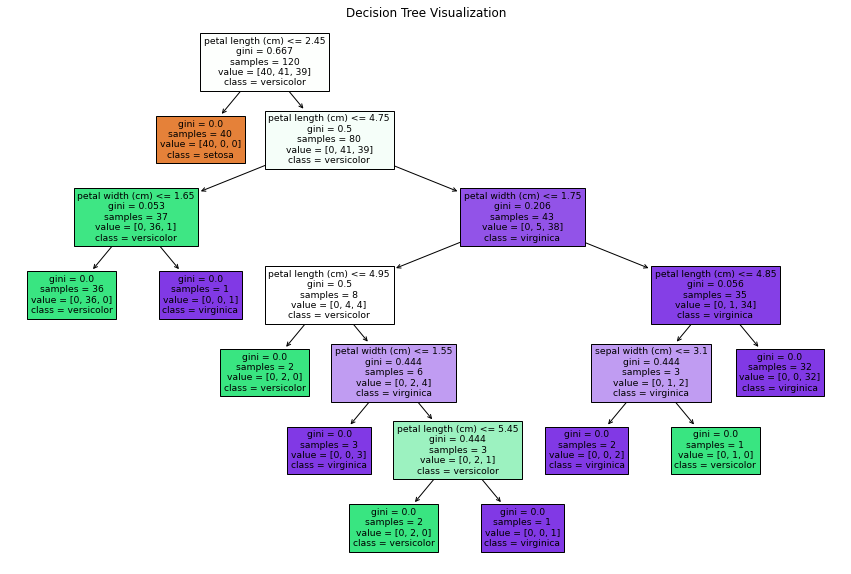

In [20]:
#Q.1decision tree operation
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [21]:
#Q.2Write a python program for implementation of simplex algorithm.
from scipy.optimize import linprog

# Coefficients for the objective function (we minimize by default, so use negative for maximization)
c = [-3, -2]  # Example objective: maximize 3x + 2y

# Coefficients for inequality constraints (Ax <= b)
A = [
    [1, 2],    # Constraint 1: x + 2y <= 10
    [3, 2]     # Constraint 2: 3x + 2y <= 15
]
b = [10, 15]

# Bounds for each variable (x >= 0, y >= 0)
bounds = [(0, None), (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')

# Display results
print("Optimal solution:", result.x)
print("Maximum value of the objective:", -result.fun)  

Optimal solution: [2.5  3.75]
Maximum value of the objective: 15.0


# slip 7 

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
 [[1 1]
 [1 2]]


<function matplotlib.pyplot.show(close=None, block=None)>

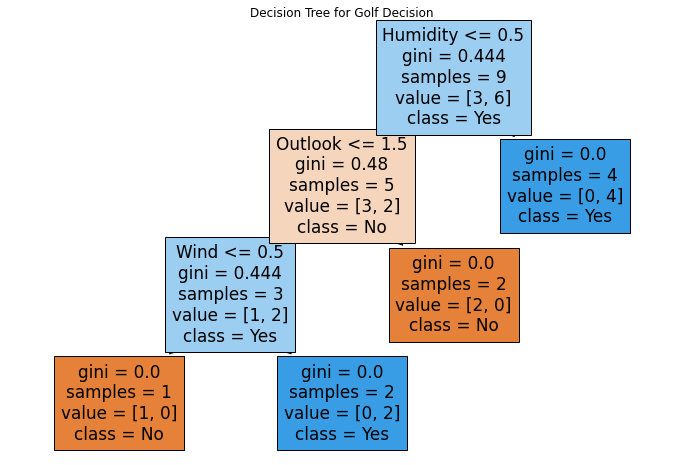

In [22]:
#Q.1Implement classical golf case for playing golf game or not.
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert dataset into a DataFrame
df = pd.DataFrame(data)

# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save label encoder for each column

# Separate features and target variable
X = df.drop(columns=['PlayGolf'])
y = df['PlayGolf']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['PlayGolf'].classes_, filled=True)
plt.title("Decision Tree for Golf Decision")
plt.show

In [24]:
#Q.2Write a program to solve the linear programming in pulp problem in python. Ex. Max. Z = x 1 + 2x2
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable

# Define the model for maximization
model = LpProblem(sense=LpMaximize)

# Define variables (x1 and x2 >= 0)
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

# Objective function: Maximize Z = x1 + 2*x2
model += x1 + 2 * x2

# Constraints
model += x1 + 2 * x2 <= 20
model += x1 + x2 <= 12

# Solve the model
model.solve()

# Output results
print("x1:", x1.varValue)
print("x2:", x2.varValue)
print("Max Z:", model.objective.value())

x1: 0.0
x2: 10.0
Max Z: 20.0


# slip8

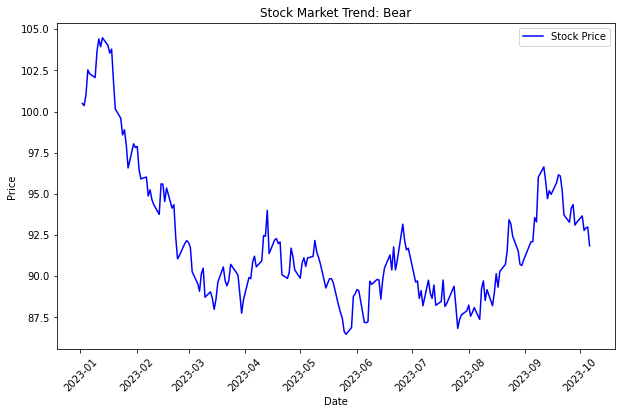

The market is in a Bear market.


In [25]:
#Q.1Create a small stock market analysis for bull or bear for a stock in NSE and BSE.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate stock prices with random data
np.random.seed(42)

# Generate 200 business days of data
dates = pd.date_range('2023-01-01', periods=200, freq='B')

# Create random price data starting at 100
prices = 100 + np.cumsum(np.random.randn(200))  # Random walk for stock price

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Price': prices})

# Determine the trend (if the last price is higher than the first price, Bull market)
if df['Price'].iloc[-1] > df['Price'].iloc[0]:
    trend = 'Bull'
else:
    trend = 'Bear'

# Plot the stock price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', color='blue')
plt.title(f'Stock Market Trend: {trend}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print the trend
print(f"The market is in a {trend} market.")

In [26]:
#Q.2Write a python code for game without saddle point. Ex. Pay off matrix[1,4,3,2]
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Define a simple 2x2 payoff matrix
payoff_matrix = [
    [2, -1],
    [-3, 1]
]

# Create the model to maximize the expected payoff (game value)
model = LpProblem(sense=LpMaximize)

# Define probability variables for each strategy (non-negative)
p1 = LpVariable("p1", lowBound=0)
p2 = LpVariable("p2", lowBound=0)

# Variable for the game value (expected payoff)
v = LpVariable("v")

# Objective: Maximize the game value v
model += v

# Constraint: probabilities must sum to 1
model += p1 + p2 == 1

# Constraints for each column in the payoff matrix
model += p1 * payoff_matrix[0][0] + p2 * payoff_matrix[1][0] >= v
model += p1 * payoff_matrix[0][1] + p2 * payoff_matrix[1][1] >= v

# Solve the model
model.solve()

# Display the results
print("Optimal Mixed Strategy:")
print(f"Probability of Strategy 1 (p1): {p1.varValue}")
print(f"Probability of Strategy 2 (p2): {p2.varValue}")
print("Game Value (Expected Payoff):", v.varValue)

Optimal Mixed Strategy:
Probability of Strategy 1 (p1): 0.57142857
Probability of Strategy 2 (p2): 0.42857143
Game Value (Expected Payoff): -0.14285714


# Slip9

In [27]:
#Q.2 Two person zero sum game with saddle point. Define the payoff matrix[3,2,1,4]
payoff_matrix = [
    [3, -1, 2],
    [1, 4, -2],
    [-2, -3, 5]
]

# Display the payoff matrix
print("Payoff Matrix:")
for row in payoff_matrix:
    print(row)

# Step 1: Find the minimum of each row
row_min = [min(row) for row in payoff_matrix]
print("\nMinimum of each row:", row_min)

# Step 2: Find the maximum of each column
column_max = [max(col) for col in zip(*payoff_matrix)]
print("Maximum of each column:", column_max)

# Step 3: Identify the saddle point
saddle_point_found = False
for i in range(len(payoff_matrix)):
    for j in range(len(payoff_matrix[i])):
        if payoff_matrix[i][j] == row_min[i] and payoff_matrix[i][j] == column_max[j]:
            print(f"\nSaddle point found at position ({i}, {j}) with value: {payoff_matrix[i][j]}")
            saddle_point_found = True
            break
    if saddle_point_found:
        break

if not saddle_point_found:
    print("\nNo saddle point found in the given payoff matrix.")


Payoff Matrix:
[3, -1, 2]
[1, 4, -2]
[-2, -3, 5]

Minimum of each row: [-1, -2, -3]
Maximum of each column: [3, 4, 5]

No saddle point found in the given payoff matrix.


# Slip 10

In [29]:
#Q.1 Data Cleaning
import pandas as pd
# Load your data
file_path = "C:/Employee1.csv"
data = pd.read_csv(file_path)
# Display the first few rows to understand the structure
print(data.head())

#Handling missing values
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())
# Option 1: Drop rows with any missing values
data = data.dropna()

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())
# Drop duplicate rows
data = data.drop_duplicates()

# Rename columns
data = data.rename(columns={'Education': 'Employee Education'})

# Check the cleaned data
print(data.info())
print(data.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  
Missing values in each column:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomai

# OR

In [30]:
#Data cleaning
import pandas as pd
 # Example DataFrame (replace this with your actual data)
 data = pd.DataFrame({
 'Column1': [1, 2, 3, 4, None, 6, 7],
 'Column2': [None, 2, 3, 4, 5, 6, 7],
 'Column3': ['A', 'B', 'C', 'D', 'E', 'F', 'F']
 })
 # 1. Handle missing values (fill with the mean for numeric columns)
 data['Column1'].fillna(data['Column1'].mean(), inplace=True)
 data['Column2'].fillna(data['Column2'].mean(), inplace=True)
 # 2. Remove duplicates
 data.drop_duplicates(inplace=True)
 # 3. Convert data types (e.g., Column3 should be categorical)
 data['Column3'] = data['Column3'].astype('category')
 # 4. Check data after cleaning
 print(data)


    Column1  Column2 Column3
0  1.000000      4.5       A
1  2.000000      2.0       B
2  3.000000      3.0       C
3  4.000000      4.0       D
4  3.833333      5.0       E
5  6.000000      6.0       F
6  7.000000      7.0       F


In [46]:
#Q.2 Two person zero sum game without saddle point.
# Define the payoff matrix
payoff_matrix = [
    [1, -1, 3],
    [-2, 4, 0],
    [2, -3, -1]
]

# Display the payoff matrix
print("Payoff Matrix:")
for row in payoff_matrix:
    print(row)

# Step 1: Find the minimum of each row
row_min = [min(row) for row in payoff_matrix]
print("\nMinimum of each row:", row_min)

# Step 2: Find the maximum of each column
column_max = [max(col) for col in zip(*payoff_matrix)]
print("Maximum of each column:", column_max)

# Step 3: Check for a saddle point
saddle_point_found = False
for i in range(len(payoff_matrix)):
    for j in range(len(payoff_matrix[i])):
        # Check if the current element is the row minimum and column maximum
        if payoff_matrix[i][j] == row_min[i] and payoff_matrix[i][j] == column_max[j]:
            print(f"\nSaddle point found at position ({i}, {j}) with value: {payoff_matrix[i][j]}")
            saddle_point_found = True
            break
    if saddle_point_found:
        break

# If no saddle point was found, inform the user
if not saddle_point_found:
    print("\nNo saddle point found in the given payoff matrix.")
    print("The game does not have a pure strategy equilibrium.")
    print("Mixed strategies may be required for an optimal solution.")

Payoff Matrix:
[1, -1, 3]
[-2, 4, 0]
[2, -3, -1]

Minimum of each row: [-1, -2, -3]
Maximum of each column: [2, 4, 3]

No saddle point found in the given payoff matrix.
The game does not have a pure strategy equilibrium.
Mixed strategies may be required for an optimal solution.


# Slip11

In [36]:
#Q.1) Perform Regression over the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Employee1.csv")

# Data Preprocessing
data.dropna(inplace=True)
X = data[["Gender", "Bonus %", "Senior Management", "Team"]]  # Example feature columns
y = data["Salary"]  # Target variable

# Convert categorical data to numerical (assuming 'Gender', 'Senior Management', and 'Team' need encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output Results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Absolute Error (MAE): 28920.648583359773
Mean Squared Error (MSE): 1148887287.4437635
R^2 Score: -0.021830276544109406
Coefficients: [ -258.52948175  2315.1569587   -448.7226293   -278.40601778
   -79.3980857   3241.67091864  7919.60257658  1520.29145579
  1902.420497   -1189.02208142 -2246.37829395  3494.26932492]
Intercept: 90240.34836898927


In [35]:
#Q.2Write a python program for implementation of simplex algorithm.
from scipy.optimize import linprog

# Coefficients for the objective function (we minimize by default, so use negative for maximization)
c = [-3, -2]  # Example objective: maximize 3x + 2y

# Coefficients for inequality constraints (Ax <= b)
A = [
    [1, 2],    # Constraint 1: x + 2y <= 10
    [3, 2]     # Constraint 2: 3x + 2y <= 15
]
b = [10, 15]

# Bounds for each variable (x >= 0, y >= 0)
bounds = [(0, None), (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')

# Display results
print("Optimal solution:", result.x)
print("Maximum value of the objective:", -result.fun)

Optimal solution: [2.5  3.75]
Maximum value of the objective: 15.0


# Slip12

In [37]:
#Q.1Classification of dataset.
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [39]:
#Q.2Write a python code for VAM. Ex. Obtain the IBFS by Vogel’s Approximation Method.D1 D2 D3 Capacity
#8 6 10 20
def vogels_approximation_method(supply, demand, cost):
    rows = len(supply)
    cols = len(demand)
    allocation = [[0] * cols for _ in range(rows)]

    while sum(supply) > 0 and sum(demand) > 0:
        row_penalty = [
            max(cost[i]) - sorted(cost[i])[0] if supply[i] > 0 else float('inf')
            for i in range(rows)]
        
        col_penalty = [
            max([cost[i][j] for i in range(rows)]) - min([cost[i][j] for i in range(rows)])
            if demand[j] > 0 else float('inf')
            for j in range(cols)]

        # Find the row/column with the highest penalty
        if min(row_penalty) <= min(col_penalty):
            i = row_penalty.index(min(row_penalty))
            j = cost[i].index(min(cost[i]))
        else:
            j = col_penalty.index(min(col_penalty))
            i = min(range(rows), key=lambda x: cost[x][j] if supply[x] > 0 else float('inf'))

        # Allocate as much as possible
        allocation_amount = min(supply[i], demand[j])
        allocation[i][j] = allocation_amount
        supply[i] -= allocation_amount
        demand[j] -= allocation_amount

    return allocation

def calculate_total_cost(allocation, cost):
    total_cost = 0
    for i in range(len(allocation)):
        for j in range(len(allocation[0])):
            total_cost += allocation[i][j] * cost[i][j]
    return total_cost

# Example usage
supply = [20, 30, 25]  # Supply for each source
demand = [30, 25, 20]  # Demand for each destination
cost = [[8, 6, 10],[9, 12, 13],[14, 9, 16]]

allocation = vogels_approximation_method(supply, demand, cost)
print("Allocation Matrix:")
for row in allocation:
    print(row)

total_cost = calculate_total_cost(allocation, cost)
print(f"\nTotal Transportation Cost: {total_cost}")

Allocation Matrix:
[0, 20, 0]
[30, 0, 0]
[0, 5, 20]

Total Transportation Cost: 755


# slip 13

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


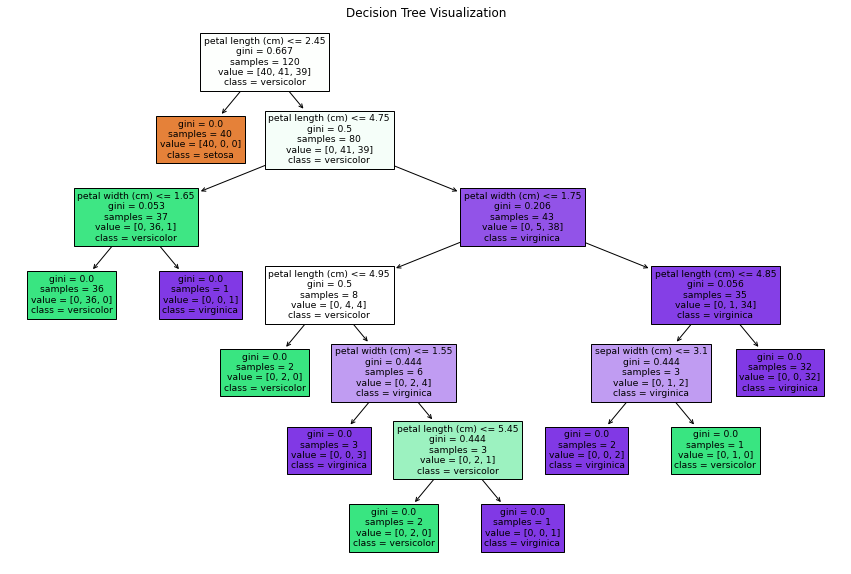

In [40]:
#Q.1decision tree operation
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [41]:
#Q.2) Write a python code for Vogel’s Approximation method. Ex. Obtain the IBFS by VAM 21,16,15,13
import numpy as np

def vogel_approximation_method(supply, demand, costs):
    supply = supply[:]
    demand = demand[:]
    costs = np.array(costs)
    allocation = np.zeros_like(costs, dtype=int)
    large_number = 999999  # Large number to represent 'infinity'

    while sum(supply) > 0 and sum(demand) > 0:
        # Calculate row and column penalties
        row_penalties = [(sorted(row[row > 0])[:2] if len(row[row > 0]) >= 2 else [0, 0]) for row in costs]
        row_penalties = [abs(r[1] - r[0]) if r[1] else 0 for r in row_penalties]

        col_penalties = [(sorted(col[col > 0])[:2] if len(col[col > 0]) >= 2 else [0, 0]) for col in costs.T]
        col_penalties = [abs(c[1] - c[0]) if c[1] else 0 for c in col_penalties]

        # Find the maximum penalty
        if max(row_penalties) >= max(col_penalties):
            row = row_penalties.index(max(row_penalties))
            col = np.argmin([cost if demand[c] > 0 else large_number for c, cost in enumerate(costs[row])])
        else:
            col = col_penalties.index(max(col_penalties))
            row = np.argmin([costs[r][col] if supply[r] > 0 else large_number for r in range(len(supply))])

        # Allocate as much as possible to the chosen cell
        allocation[row][col] = min(supply[row], demand[col])
        supply[row] -= allocation[row][col]
        demand[col] -= allocation[row][col]

        # Set completed rows or columns to a large number
        if supply[row] == 0:
            costs[row, :] = large_number
        if demand[col] == 0:
            costs[:, col] = large_number

    return allocation

# Example usage
supply = [11, 13, 19]
demand = [6, 10, 12, 15]
costs = [[21, 16, 15, 13], [17, 18, 14, 23], [32, 27, 18, 41]]

print(vogel_approximation_method(supply, demand, costs))

[[ 0  0  0 11]
 [ 6  3  0  4]
 [ 0  7 12  0]]


# Slip 14

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
 [[1 1]
 [1 2]]


<function matplotlib.pyplot.show(close=None, block=None)>

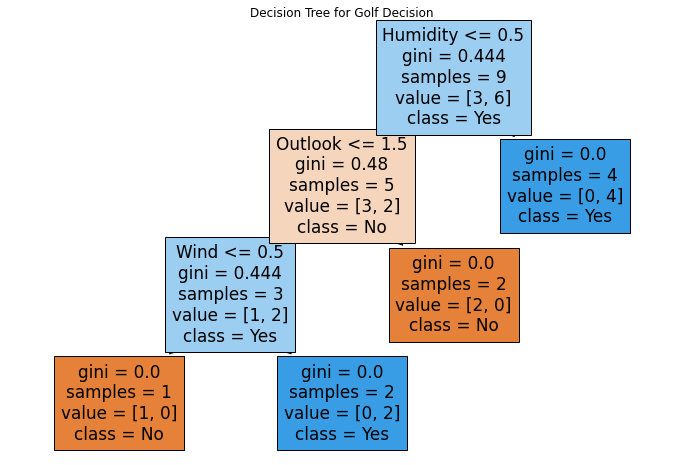

In [42]:
#Q.1Implement classical golf case for playing golf game or not.
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert dataset into a DataFrame
df = pd.DataFrame(data)

# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save label encoder for each column

# Separate features and target variable
X = df.drop(columns=['PlayGolf'])
y = df['PlayGolf']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['PlayGolf'].classes_, filled=True)
plt.title("Decision Tree for Golf Decision")
plt.show

In [43]:
#Q.2) Write a python code for North-West corner method.13 15 16 17

import numpy as np
import pandas as pd

# Define the supply, demand, and cost matrix
supply = [17, 12, 16]
demand = [14, 8, 23]
costs = np.array([[13, 15, 16],
                  [7, 11, 2],
                  [19, 20, 9]])

# Initialize allocation matrix with zeros
allocation = np.zeros((len(supply), len(demand)), dtype=int)

# North-West Corner Method
i, j = 0, 0
while i < len(supply) and j < len(demand):
    if supply[i] < demand[j]:
        allocation[i, j] = supply[i]
        demand[j] -= supply[i]
        i += 1
    else:
        allocation[i, j] = demand[j]
        supply[i] -= demand[j]
        j += 1

# Convert allocation and costs to a DataFrame for better readability
allocation_df = pd.DataFrame(allocation, columns=["D1", "D2", "D3"], index=["O1", "O2", "O3"])
cost_df = pd.DataFrame(costs, columns=["D1", "D2", "D3"], index=["O1", "O2", "O3"])

# Display the allocation and cost matrix
print("Cost Matrix:")
print(cost_df)
print("\nAllocation Matrix (Initial Basic Feasible Solution):")
print(allocation_df)

# Calculate total cost
total_cost = (allocation * costs).sum()
print("\nTotal Transportation Cost:", total_cost)

Cost Matrix:
    D1  D2  D3
O1  13  15  16
O2   7  11   2
O3  19  20   9

Allocation Matrix (Initial Basic Feasible Solution):
    D1  D2  D3
O1  14   3   0
O2   0   5   7
O3   0   0  16

Total Transportation Cost: 440


# Slip 15

In [ ]:
#Q.2Write a program to solve the linear programming in pulp problem in python. Ex. Max. Z = x 1 + 2x2
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable

# Define the model for maximization
model = LpProblem(sense=LpMaximize)

# Define variables (x1 and x2 >= 0)
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

# Objective function: Maximize Z = x1 + 2*x2
model += x1 + 2 * x2

# Constraints
model += x1 + 2 * x2 <= 20
model += x1 + x2 <= 12

# Solve the model
model.solve()

# Output results
print("x1:", x1.varValue)
print("x2:", x2.varValue)
print("Max Z:", model.objective.value())